# Decision Trees
In this challenge, we will use decision trees in both a classification and regression task. We visualize each of these representations. We will use the `mpg` dataset. It's a car dataset.

# MISSION 1 : Regression Trees

# Exercice 1
- Drop the rows with missing values
- Drop the "name" column
- Transform the "origin" column (encode it) to represent the following:
  - USA = 0, Japan = 1, Europe = 2

In [2]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

data = sns.load_dataset("mpg")

In [3]:
data = data.dropna()
data = data.drop(columns=['name'])
data = pd.get_dummies(data, columns=['origin'], prefix='', prefix_sep='')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,europe,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


# Exercice 2
- Prepare your X and y (mpg column) as a target.
- Split into train and test splits using random state of 42 and a test size of 20%.

In [4]:
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'europe', 'japan', 'usa']]
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exercice 3
-  Fit a decision tree (Regression)

In [5]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

# Exercice 4
- Predict on the xtest set

In [6]:
y_predict = model.predict(X_test)
y_predict

array([23. , 19. , 37.2, 30. , 27. , 27. , 11. , 31.5, 18. , 27. , 15. ,
       18. , 15.5, 29. , 17. , 27. , 20. , 32.4, 31.3, 37. , 20.3, 36. ,
       35.1, 17. , 31. , 28. , 18. , 18. , 26. , 23. , 16. , 20.2, 23.9,
       28. , 14. , 31. ,  9. , 25. , 14. , 12. , 14. , 29. , 36. , 25. ,
       16. , 11. , 19. , 44.3, 23. , 29.5, 14. , 21. , 21. , 37. , 38. ,
       16. , 15.5, 19. , 24. , 21. , 12. , 22. , 28.8, 23.8, 23.9, 26. ,
       24.5, 29.5, 23.9, 14. , 23. , 13. , 20.3, 19. , 20.5, 24. , 13. ,
       18. , 24. ])

# Exercice 5
- Print out the R2 score (train and test data).

In [ ]:
from sklearn.metrics import r2_score

print(f'The r2 score is {r2_score(y_test, y_predict)}')

The r2 score is 0.7970565034161028


# Exercice 6
- Print each feature with importance % using a method from the DecisionTree object.


In [ ]:
for i in zip(X.columns, model.feature_importances_):
  print(f'{i[0]} {round(i[1] * 100, 2)}%')

cylinders 0.69%
displacement 62.25%
horsepower 17.42%
weight 6.33%
acceleration 2.2%
model_year 10.44%
europe 0.07%
japan 0.47%
usa 0.13%


# Exercice 7
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

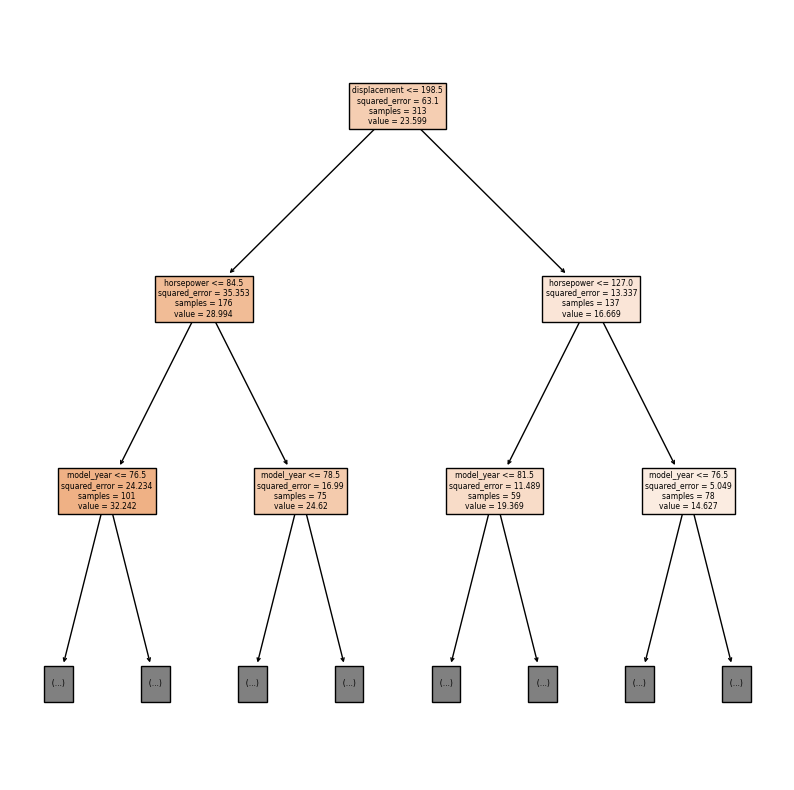

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plot_tree(model, filled=True, feature_names=X_train.columns, max_depth=2)
plt.show()

# MISSION 2 : Classification Trees
# EXERCICE 1
- Drop rows with missing values
- Turn the species column into numeric (encode it) :
  - Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2
- Turn the island column into numeric (encode it) :
  - Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

In [ ]:
# Load in the Penguins dataset
data = sns.load_dataset('penguins')
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
encoding = {
    'species': {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2},
    'island': {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}
}

data.dropna(inplace=True)
data.replace(encoding, inplace=True)
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,Male
1,0,0,39.5,17.4,186.0,3800.0,Female
2,0,0,40.3,18.0,195.0,3250.0,Female
4,0,0,36.7,19.3,193.0,3450.0,Female
5,0,0,39.3,20.6,190.0,3650.0,Male


# EXERCICE 2
- Save as variable your X and your y (column "sex")
- Using a random state of 42 and a test size of 0.20, split in training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

X = data[['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = data['sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# EXERCICE 3
-  Fit a decision tree (Classification)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

# Exercice 4
- Predict on the X_test set

In [ ]:
y_predict = model.predict(X_test)

# Exercice 5
- Print the accuracy score for the predictions (Train et test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_predict, y_test)

0.8507462686567164

# Exercice 6
- Print each feature with importance % using a method from the DecisionTree object.

In [ ]:
for i in zip(X.columns, model.feature_importances_):
  print(f'{i[0]} {round(i[1] * 100, 2)}%')

species 0.45%
island 1.0%
bill_length_mm 8.32%
bill_depth_mm 50.8%
flipper_length_mm 2.98%
body_mass_g 36.44%


# Exercice 7
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

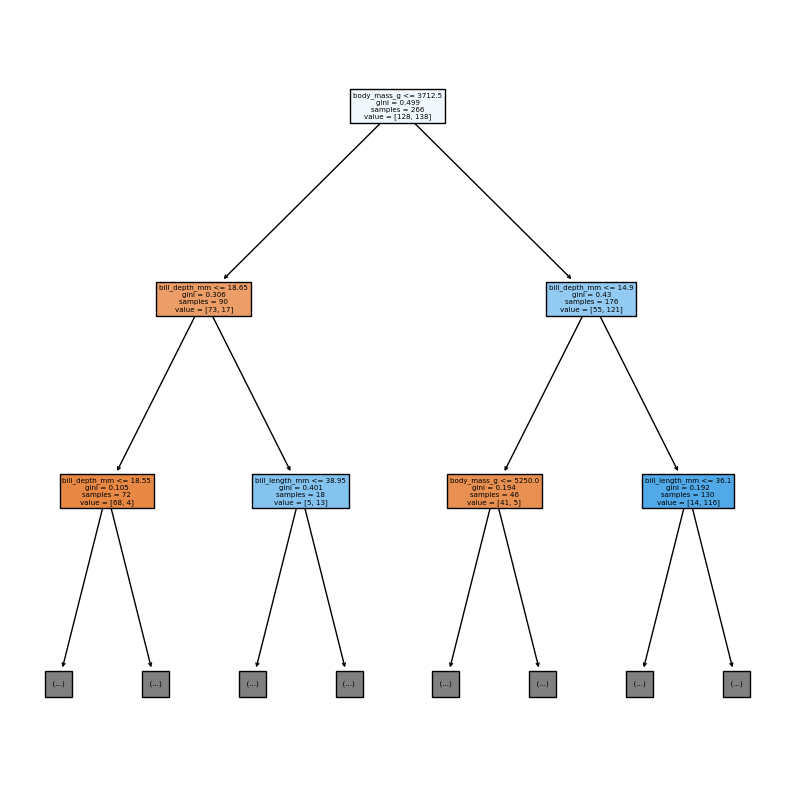

In [ ]:
plt.figure(figsize = (10,10))
plot_tree(model, filled=True, feature_names=X_train.columns, max_depth=2)
plt.show()

# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!***

Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).

# Machine Learning Optimization
Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.


# Exercice 8
- Using a random state of 42, fit multiple decision trees with various max depths.
- Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))

In [ ]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))
list_of_accuracies_train = []
list_of_accuracies_test = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for i in range(1, 11):
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(X_train, y_train)

  y_train_predict = model.predict(X_train)
  y_test_predict = model.predict(X_test)

  list_of_accuracies_train.append(accuracy_score(y_train_predict, y_train))
  list_of_accuracies_test.append(accuracy_score(y_test_predict, y_test))

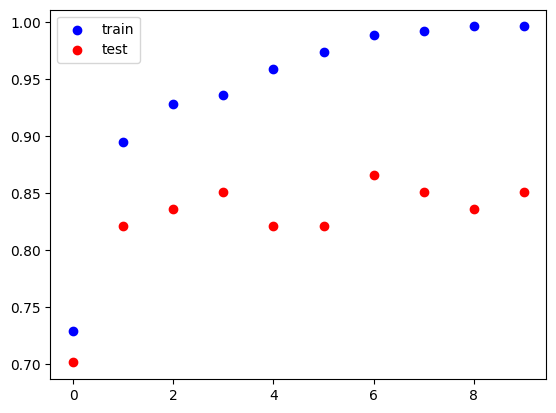

In [ ]:
import matplotlib.pyplot as plt

x = list(range(len(list_of_accuracies_train)))

plt.scatter(x, list_of_accuracies_train, label='train', color='blue')
plt.scatter(x, list_of_accuracies_test, label='test', color='red')
plt.legend()
